In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1: Segmentation 

In [10]:
set1 = pd.read_csv("/Users/swati/Desktop/water_rides.csv")
set1

,rideID,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,1,4,27.47,59.64,4.0,658.35,66.77,7389.98,46702.30,4980.30
1,2,4,25.02,106.54,6.0,455.65,48.15,11757.48,54579.92,5313.93
2,3,5,30.82,61.17,6.0,536.13,65.02,9403.26,51244.81,5510.27
3,4,1,34.10,97.18,6.0,673.44,62.18,6191.53,50332.71,5039.14
4,5,3,30.38,89.46,5.0,518.29,75.54,9632.71,50069.21,6169.58
...,...,...,...,...,...,...,...,...,...,...
141,142,5,22.55,52.44,7.0,884.15,73.93,4776.29,37412.64,5725.10
142,143,4,19.16,93.50,6.0,1011.72,81.60,7552.68,51310.62,4732.18
143,144,1,29.71,62.16,3.0,438.22,61.71,8899.01,42104.62,6361.64
144,145,2,38.49,80.91,2.0,492.08,63.67,10298.33,48164.58,5005.91


In [13]:
set2=set1.drop('rideID', 1)
set2

/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_850/528890325.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  set2=set1.drop('rideID', 1)


,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,4,27.47,59.64,4.0,658.35,66.77,7389.98,46702.30,4980.30
1,4,25.02,106.54,6.0,455.65,48.15,11757.48,54579.92,5313.93
2,5,30.82,61.17,6.0,536.13,65.02,9403.26,51244.81,5510.27
3,1,34.10,97.18,6.0,673.44,62.18,6191.53,50332.71,5039.14
4,3,30.38,89.46,5.0,518.29,75.54,9632.71,50069.21,6169.58
...,...,...,...,...,...,...,...,...,...
141,5,22.55,52.44,7.0,884.15,73.93,4776.29,37412.64,5725.10
142,4,19.16,93.50,6.0,1011.72,81.60,7552.68,51310.62,4732.18
143,1,29.71,62.16,3.0,438.22,61.71,8899.01,42104.62,6361.64
144,2,38.49,80.91,2.0,492.08,63.67,10298.33,48164.58,5005.91


*rideID would not be relevant in clustering model because in the cluster model if we include a variable that just depicts the serial number of type of rides in our data, it would make our model less relevant as while calculating the Euclidean distance, we might calculate irrelavant values as it is the distance between two points. As per clustering, Euclidean distance is the distance or similarity between two clusters. Using rideID would also include the similaries between two cflusters based on rideID which is meaningless as it is a just a serial number, it has no significance for deriving differentiation in clusters.*

In [16]:
#B
set2.describe()

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.034247,27.977055,84.398904,4.130137,656.367671,70.963288,8365.876096,48274.652192,5294.443082
std,1.492114,5.444213,25.553449,2.407642,267.974494,8.010506,1536.103405,3898.341493,750.138648
min,1.000000,11.870000,15.130000,0.000000,1.350000,48.150000,4246.200000,37412.640000,2870.020000
25%,2.000000,24.720000,66.617500,2.000000,506.185000,65.632500,7249.445000,45799.077500,4837.440000
50%,3.000000,28.110000,85.465000,4.000000,645.805000,70.770000,8347.685000,48463.020000,5334.280000
75%,4.000000,32.315000,101.997500,6.000000,865.947500,76.192500,9424.557500,51056.420000,5825.502500
max,8.000000,38.870000,144.010000,8.000000,1259.730000,94.840000,12044.960000,56666.250000,7204.960000


*Describe function helped me to understand where my data set lies. for example, I can see what is the range(max-min) of my columns such as soak_level, rider_group, duration etc through which I can conduct good analysis like how should lobster land base their operational duties and staffing requirements. There could be various explainations with the help of this. Also, we can find a gist of our data set which would be helpful in building our clustering approach which means to guess how many cluster groups to form. It is valuable for an analyst because an analyst can get insights about statistical functions and make a analytical approach through this, otherwise analyst would have to call all the functions separately to get statistical signifance. for example- an analyst can check skewness of his dataset with the help of describe function.*

In [19]:
#C.
set2.isnull().sum()

rider_group              0
max_speed                0
total_height             0
soak_level               0
max_hourly_throughput    0
avg_duration             0
square_feet              0
installation_cost        0
maintenance_cost         0
dtype: int64

*There are no missing values in my data set.*

*#D.
#a. Yes my model needs to be standardized because all the columns are in different measuring units, hence we can not just compare them by watching the values.*


In [25]:
#b.
import scipy.stats as stats
set3=stats.zscore(set2)
set3

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,0.649466,-0.093457,-0.972242,-0.054238,0.007423,-0.525275,-0.637493,-0.404727,-0.420222
1,0.649466,-0.545025,0.869445,0.779310,-0.751596,-2.857724,2.215527,1.622991,0.026067
2,1.321963,0.523993,-0.912161,0.779310,-0.450235,-0.744491,0.677659,0.764526,0.288706
3,-1.368025,1.128542,0.501893,0.779310,0.063928,-1.100245,-1.420367,0.529749,-0.341513
4,-0.023031,0.442895,0.198741,0.362536,-0.517038,0.573305,0.827545,0.461923,1.170650
...,...,...,...,...,...,...,...,...,...
141,1.321963,-1.000280,-1.254974,1.196084,0.852941,0.371628,-2.344857,-2.795908,0.576079
142,0.649466,-1.625103,0.357385,0.779310,1.330633,1.332416,-0.531211,0.781465,-0.752126
143,-1.368025,0.319405,-0.873286,-0.471012,-0.816864,-1.159120,0.348264,-1.588181,1.427564
144,-0.695528,1.937679,-0.137004,-0.887785,-0.615182,-0.913599,1.262354,-0.028333,-0.385964


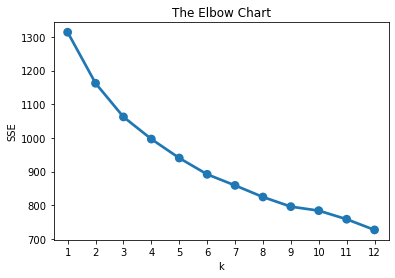

In [35]:
#E.
#a.
sse = {}
for k in range(1, 13):    
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(set3)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Chart')

plt.xlabel('k')

plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

*#F.*
*I will use 5 clusters for my k-means model as I can see some pattern of equivalent sized clusters with differentiations exisiting. If I tried to exceed, there were very less differentiation seen.*


In [84]:
#G.
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(set3)
cluster_labels = kmeans.labels_

In [40]:
set3.columns

Index(['rider_group', 'max_speed', 'total_height', 'soak_level',
       'max_hourly_throughput', 'avg_duration', 'square_feet',
       'installation_cost', 'maintenance_cost'],
      dtype='object')

In [113]:
#H.
kmeans2 = set3.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'rider_group': 'mean',
'max_speed': 'mean',
'total_height': 'mean',
'soak_level': 'mean',
'max_hourly_throughput': 'mean',
'avg_duration': 'mean',
'square_feet': 'mean',
'installation_cost': 'mean',
'maintenance_cost': ['mean', 'count'],
}).round(2)

rider_group max_speed total_height soak_level max_hourly_throughput  \
               mean      mean         mean       mean                  mean   
Cluster                                                                       
0              1.22      0.73        -0.64      -0.02                 -0.13   
1             -0.55     -0.68        -0.43      -0.86                  0.09   
2             -0.23     -0.13         0.06       0.78                  0.26   
3             -0.21      0.47         0.82       0.34                 -0.30   
4              0.02     -0.72        -0.19      -0.42                  0.29   

        avg_duration square_feet installation_cost maintenance_cost        
                mean        mean              mean             mean count  
Cluster                                                                    
0              -0.34       -0.07              0.03            -0.16    27  
1               0.07        0.47             -0.27             0.65    33  
2               0.84       -0.81             -0.60             0.20    29  
3              -0.39        0.64              0.57             0.07    40  
4              -0.11       -0.93              0.18            -1.51    17

In [92]:

kmeans2

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost,Cluster
0,0.649466,-0.093457,-0.972242,-0.054238,0.007423,-0.525275,-0.637493,-0.404727,-0.420222,0
1,0.649466,-0.545025,0.869445,0.779310,-0.751596,-2.857724,2.215527,1.622991,0.026067,3
2,1.321963,0.523993,-0.912161,0.779310,-0.450235,-0.744491,0.677659,0.764526,0.288706,0
3,-1.368025,1.128542,0.501893,0.779310,0.063928,-1.100245,-1.420367,0.529749,-0.341513,3
4,-0.023031,0.442895,0.198741,0.362536,-0.517038,0.573305,0.827545,0.461923,1.170650,3
...,...,...,...,...,...,...,...,...,...,...
141,1.321963,-1.000280,-1.254974,1.196084,0.852941,0.371628,-2.344857,-2.795908,0.576079,2
142,0.649466,-1.625103,0.357385,0.779310,1.330633,1.332416,-0.531211,0.781465,-0.752126,4
143,-1.368025,0.319405,-0.873286,-0.471012,-0.816864,-1.159120,0.348264,-1.588181,1.427564,1
144,-0.695528,1.937679,-0.137004,-0.887785,-0.615182,-0.913599,1.262354,-0.028333,-0.385964,3


In [86]:
kmeans2['Cluster'] = kmeans2['Cluster'].astype('category')

In [97]:
#I.
#1st Visualization-
more_data = kmeans2.groupby('Cluster')[['max_speed', 'avg_duration']].mean()
more_data

,max_speed,avg_duration
Cluster,,
0,0.733019,-0.342851
1,-0.680356,0.073988
2,-0.132671,0.842195
3,0.469897,-0.394905
4,-0.722834,-0.106593


<AxesSubplot:xlabel='max_speed', ylabel='avg_duration'>

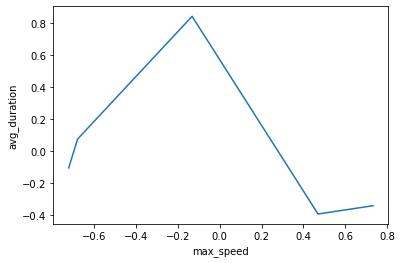

In [105]:
sns.lineplot(x='max_speed', y='avg_duration', data=more_data)


*This visualization depicts the average duration of rides by maximum speeds of different rides in my clusters. By this I wanted to see the difference in durations of rides when rides reach there maximum speed. I have used a line plot to show a trend of maximum speed and avg_duration of rides.*

In [106]:
#2nd visualization
more_data2=kmeans2.groupby('Cluster')[['maintenance_cost', 'square_feet']].mean()
more_data2

,maintenance_cost,square_feet
Cluster,,
0,-0.155120,-0.070134
1,0.646008,0.474269
2,0.199924,-0.810665
3,0.070663,0.641066
4,-1.514963,-0.934740


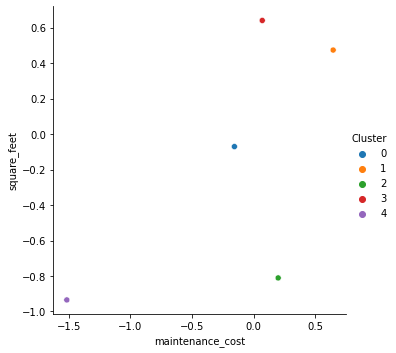

In [95]:
sns.relplot(x='maintenance_cost', y='square_feet', hue='Cluster', data=more_data2)

*This chart shows the difference between maintenance cost as per square feet area taken by rides in my clusters. Cluster 4 has the lowest maintenance cost with lowest square feet area. Cluster 3 and 1 have highest maintenance cost with highest square feet. We can state that as the square feet area increases, the maintenance cost increases. The negative sign in the values depicts the value is lesser than mean value.*

<AxesSubplot:xlabel='Cluster', ylabel='max_hourly_throughput'>

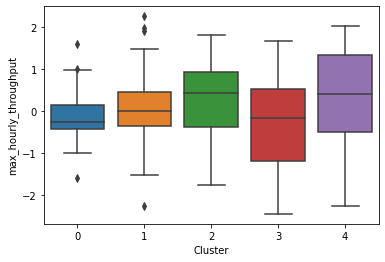

In [109]:
#3rd Visualization
sns.boxplot(x='Cluster', y='max_hourly_throughput', data=kmeans2)

*The plot shows the distribution of max_hours throughput of different clusters.The purple and green clusters have high throuhput on average while the blue and red have low throughput on average. For red and purple the throughputs have large variation as compared to blue and orange cluster. There are some ooutliers in Blue and orange clusters for throughputs*

<AxesSubplot:xlabel='soak_level', ylabel='Count'>

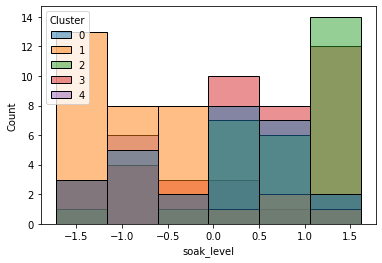

In [91]:
#4th visualization
sns.histplot(data=kmeans2, x="soak_level", hue="Cluster", bins=6)

*This visualization shows the distribution of clusters as per the soak_level. I wanted to check how are my clusters distributed on the basis of soak_level on the scale of 0 to 8 in which 0 being the dryest after a ride and 8 is the most wet after the ride. It can help me to understand the difference between my clusters to form effective points of differentiation amongst my clusters.*

*#J.

*Cluster 0: KidsMania*

*This cluster could be useful in targewting kids as it has good speed with low soak level, less height, less 
duration which is likely to be attractive for kids.* 

*Cluster 1: CoupleKid*

*This cluster could be usful in attracting couple with infant children as it has less maximum speed and for less duration and less height which these group would be willing to go to.*

*Cluster 2: WaterStream*

*This cluster has highest soak level which with highest height which makes it a water ride and we could target 
adults and teenagers.* 

*Cluster 3: TeenageCoster*

*This cluster belongs to a group which has high height and macimum speed  with hioghest inbstallment cost which is 
likely to be used by teenagers.* 

*Cluster 4: OldieBus*

*This has lo9west sopak level, low duration, low maximum speed and loess height which is suitabvle for old age group.*


#K.
Lobster land can use my clustering model because now our model is devided into 5 segments wherein we can use different marketing strategies and build operatiional structure. Also they can benefit financially by choosing segment based marketing. Based on the clusters created by us, lobster land can specific targetted advertisements via different modes of marketing such as, it can use printed ads for oldieBUS cluster because people of higher age are likely to read print ads in newspapers in their morning routine. For Teenage coster- we can use social media ads because teenagers are most active on social media. We can use mass marketing ads for waterStream because their is not a specific group that would be interested in water rides. For couple kid, we could put ads on public places such as malls, roads etc because couples with children do travel for picnics, shopping malls to spend time with family. We can use school campaigns to attract kids for kidsmania. 

Our model could be used in other ways such as we can make our staffing duties depending on the clusters. for example- the cluster that has the highest average duration (oldiebus) can be handled with less staff as compared to the rides that require frequent guests changes every few minutes such as teenagecoster. Also, we can limit our resources based on that in order to gain more profits.  

# Part II: Conjoint Analysis with a Linear Model

In [118]:
#A.
df = pd.read_csv("/Users/swati/Desktop/entertainment.csv")
df

,bundleID,live_science,live_nature,live_magic,dance_troupes,sing_styles,comedy_styles,show_length,avg_rating
0,1,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,10,7.516434
1,2,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,20,7.392987
2,3,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,30,8.921361
3,4,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,10,7.726377
4,5,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,20,9.659494
...,...,...,...,...,...,...,...,...,...
2587,2588,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Slapstick,20,4.583213
2588,2589,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Slapstick,30,3.722079
2589,2590,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Open Mic,10,3.330641
2590,2591,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Open Mic,20,4.022420


*B.*

*Numeric variables= bundleID, show_length, avg_rating*

*Categorical Variables= live_science, live_nature, live_magic, dance_troupes, sing_styles, comedy_styles*

In [123]:
#C.
df2=df.drop('bundleID', 1)
df2

/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_850/2429324138.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df.drop('bundleID', 1)


,live_science,live_nature,live_magic,dance_troupes,sing_styles,comedy_styles,show_length,avg_rating
0,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,10,7.516434
1,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,20,7.392987
2,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Improv,30,8.921361
3,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,10,7.726377
4,Liquid Air Show,All About Crustaceans,Card Tricks,Atlanta Ballet,Beatles,Slapstick,20,9.659494
...,...,...,...,...,...,...,...,...
2587,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Slapstick,20,4.583213
2588,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Slapstick,30,3.722079
2589,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Open Mic,10,3.330641
2590,Chemistry Fun,Fun With Vipers and Cobras,Mind Reader,Celtic Folk Dance,Open Mic,Open Mic,20,4.022420


In [138]:
df3 = pd.get_dummies(df2, drop_first=True, columns=['live_science', 'live_nature', 'live_magic', 'dance_troupes', 'sing_styles','comedy_styles','show_length'])

In [139]:
df3


,avg_rating,live_science_Liquid Air Show,live_science_Science of Fireworks,live_nature_Fun With Vipers and Cobras,live_nature_Wide World of Canines,live_magic_Mind Reader,dance_troupes_Celtic Folk Dance,dance_troupes_Hip-Hop Fusion,dance_troupes_Salsa Vida,sing_styles_Italian Opera,sing_styles_Open Mic,sing_styles_Wiggles,comedy_styles_Open Mic,comedy_styles_Slapstick,show_length_20,show_length_30
0,7.516434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.392987,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.921361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7.726377,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.659494,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,4.583213,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0
2588,3.722079,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1
2589,3.330641,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
2590,4.022420,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0


*a. It is essential to dummify numeric input variables because dummy variables enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation.*

In [140]:
#D.
X = df3[['live_science_Liquid Air Show', 'live_science_Science of Fireworks',
       'live_nature_Fun With Vipers and Cobras', 'live_nature_Wide World of Canines',
       'live_magic_Mind Reader', 'dance_troupes_Celtic Folk Dance',
       'dance_troupes_Hip-Hop Fusion', 'dance_troupes_Salsa Vida', 'sing_styles_Italian Opera','sing_styles_Open Mic']]
y = df3['avg_rating']

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [144]:
regressor.intercept_

6.5221855978023875

In [148]:
#E.
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
live_science_Liquid Air Show,0.119588
live_science_Science of Fireworks,-0.716544
live_nature_Fun With Vipers and Cobras,-2.308140
live_nature_Wide World of Canines,-0.909696
live_magic_Mind Reader,-0.198544
dance_troupes_Celtic Folk Dance,0.262085
dance_troupes_Hip-Hop Fusion,0.700387
dance_troupes_Salsa Vida,0.233955
sing_styles_Italian Opera,-0.575064
sing_styles_Open Mic,-1.439533


In [149]:
regressor.coef_

array([ 0.11958766, -0.71654413, -2.30813966, -0.90969595, -0.19854373,
        0.26208465,  0.70038728,  0.23395451, -0.5750639 , -1.43953334])

*#F.* 
*As per conjoint analysis, we can say that by the implementation of new live entertainment options, lobster land is likely to attract and entertain a good amount of population as per people's response. The analysis as per the coefficients is as follows-*

*1. live_science-liquid air show is better than science of fireworks*

*2. live nature fun-wild world of canines is better than fun with vipers and cobras*

*3. live magic-mind reader is picked amongst other live magic option*

*4. dance troupes jip hop fusion is liked more as compared to other options. But celtic folk dance and salsa style vida is also liked by a good part of population.*

*5. sing_style have a negative coefficient which means none of them is much preferred by the audience.* 

*If we dive deep into the reasoning of the above mentioned analysis, we can suggest that we could go with a different perspective of widening our business. For example- if lobster_land is famous for water rides, parents of young children, teenagers are more likely to come. We can target old age people as well if we tailor live entertainment. If we want to expand our audience, we can focus on liquid air show, science of fireworks, folk dance, salsa vida, hip hop fusion, italian opera, the Beatles as old age population is not likely to get into rides and also it's not allowed for people with underlying health conditions to take the rides. So, we can attract such audience if we involve live entertainment which can be seen and audience could be entertained by being just seated on a chair. With the help of the options chosen, we can also attract kids as they also enjoy magic shows and families would like to take their grandparents and children for such live entertainments as a day off.*